In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def fun_data(w,b,size):
    x = torch.normal(0,1,(size,len(w)))
    y = torch.matmul(x,w)+b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w = torch.tensor([3,-3.4])
true_b = 4.2
features, labels = fun_data(true_w,true_b,1000)

In [4]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.0990, -1.0323]) 
label: tensor([8.0076])


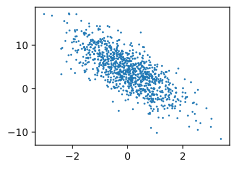

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.3275, -0.4436],
        [-0.3199, -1.3521],
        [ 1.9633, -2.1246],
        [-0.1317, -2.0144],
        [ 0.2184, -1.9104],
        [-0.5380, -0.3259],
        [ 0.7292,  0.1996],
        [ 0.8980,  1.0102],
        [ 0.7924, -0.5345],
        [-0.9540,  1.1052]]) 
 tensor([[ 4.7347],
        [ 7.8314],
        [17.3137],
        [10.6485],
        [11.3575],
        [ 3.7140],
        [ 5.7029],
        [ 3.4638],
        [ 8.3969],
        [-2.4226]])


In [9]:
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)

tensor([[ 1.0697, -0.9864],
        [ 0.1402,  0.5663],
        [ 0.4555,  0.9637],
        [ 0.8272,  0.0939],
        [ 1.0344, -0.2496],
        [-0.6568,  0.3012],
        [ 0.6198,  0.1231],
        [-0.2912, -1.4245],
        [ 0.8134, -0.3465],
        [-0.0237,  1.7205]]) 
 tensor([[10.7675],
        [ 2.6845],
        [ 2.3007],
        [ 6.3570],
        [ 8.1679],
        [ 1.1869],
        [ 5.6390],
        [ 8.1653],
        [ 7.8296],
        [-1.7332]])
tensor([[ 1.4051,  0.3625],
        [ 0.1306, -0.4322],
        [ 0.1894,  0.0787],
        [-0.5893,  0.5107],
        [ 0.6926, -1.1559],
        [ 0.3626,  0.9325],
        [-1.6004,  0.1309],
        [ 1.1457, -0.6574],
        [ 0.5633,  1.1930],
        [ 0.2561,  0.2366]]) 
 tensor([[ 7.1703],
        [ 6.0546],
        [ 4.4997],
        [ 0.7038],
        [10.2097],
        [ 2.1165],
        [-1.0431],
        [ 9.8682],
        [ 1.8457],
        [ 4.1557]])
tensor([[-4.7593e-01, -1.4867e+00],
        [ 1.2980

In [10]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [11]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [12]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [13]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss{float(train_l.mean()):f}')

epoch 1,loss0.049061
epoch 2,loss0.000178
epoch 3,loss0.000049


In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0007, -0.0006], grad_fn=<SubBackward0>)
b的估计误差: tensor([7.6771e-05], grad_fn=<RsubBackward1>)
